In [171]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Анализ заголовков сообщений

Здесь смотрим на столбцы `serv_teg_inf` и `serv_teg`

In [173]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [174]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [175]:
data_logs.loc[4277]

date                                                               2023-03-06 
time                                                                  21:06:20
serv_teg_inf                                             WorldGuard Region I/O
serv_teg                                                                  INFO
serv_mess                                                                  NaN
user_authenticator_number                                                  NaN
worker_main_number                                                         NaN
async_chat_thread_number                                                   NaN
plug_name                                                           WorldGuard
plug_mess                    Region data changes made in 'world' have been ...
Name: 4277, dtype: object

Для анализа сделаем новый датафрейм без `plug_name` и 	`plug_mess`.

In [176]:
summary = data_logs[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number']]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [177]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6544,6544,6544,6544,6092
unique,10,1306,6,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1093,115,5444,6392,674


У нас есть несколько строк от плагина WorldGuard - `WorldGuard Region I/O` без информации в столбце `serv_mess`, поэтому исключим их из дальнейшего рассмотрения.

In [178]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
4277,2023-03-06,21:06:20,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
4283,2023-03-06,21:08:50,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5018,2023-03-07,18:10:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5021,2023-03-07,18:10:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5023,2023-03-07,18:11:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5039,2023-03-07,18:29:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5042,2023-03-07,18:30:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5061,2023-03-07,18:42:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5066,2023-03-07,18:44:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5068,2023-03-07,18:44:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN


In [179]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O'].count()

date                         11
time                         11
serv_teg_inf                 11
serv_teg                     11
serv_mess                     0
user_authenticator_number     0
worker_main_number            0
async_chat_thread_number      0
dtype: int64

In [180]:
summary = summary[summary['serv_teg_inf'] != 'WorldGuard Region I/O']

In [181]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6533 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6533 non-null   object 
 1   time                       6533 non-null   object 
 2   serv_teg_inf               6533 non-null   object 
 3   serv_teg                   6533 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 459.4+ KB


In [182]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6533,6533,6533,6533,6092
unique,10,1295,5,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1091,115,5444,6381,674


In [183]:
summary.loc[3321]

date                           2023-03-05 
time                              14:58:48
serv_teg_inf                 Server thread
serv_teg                              INFO
serv_mess                              NaN
user_authenticator_number              NaN
worker_main_number                     NaN
async_chat_thread_number               NaN
Name: 3321, dtype: object

Также есть значительное количество сообщений от установленных плагинов, которые не выделены как у WorldGuard в отдельную категорию (`WorldGuard Region I/O`), а включены в категорию `Server thread`, и не содержат в столбце `serv_mess` данных, поэтому тоже удалим их.

In [184]:
# vibo: ищем не нулевые строки
find_index = summary['serv_mess'].dropna().index
# vibo: фильтруем по ним датафрейм
summary = summary[summary.index.isin(find_index)]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [185]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


Дальше работаем с основными сообщениями сервера, без учета сообщений от установленных плагинов. 

## 3.1 Количество сообщений в день

Визуализируем количество сообщений, которое отправляет в день сервер.

In [186]:
plot_df = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)

plot_df

,date,count_mess,%
0,2023-02-13,568,9.32
1,2023-02-14,360,5.91
2,2023-02-17,282,4.63
3,2023-03-03,594,9.75
4,2023-03-04,1018,16.71
5,2023-03-05,807,13.25
6,2023-03-06,928,15.23
7,2023-03-07,279,4.58
8,2023-03-08,795,13.05
9,2023-03-09,461,7.57


In [187]:
plot_df['count_mess'].describe()

count      10.000000
mean      609.200000
std       267.598705
min       279.000000
25%       385.250000
50%       581.000000
75%       804.000000
max      1018.000000
Name: count_mess, dtype: float64

In [188]:
med_mess_count = plot_df['count_mess'].describe()['50%']
med_mess_count

581.0

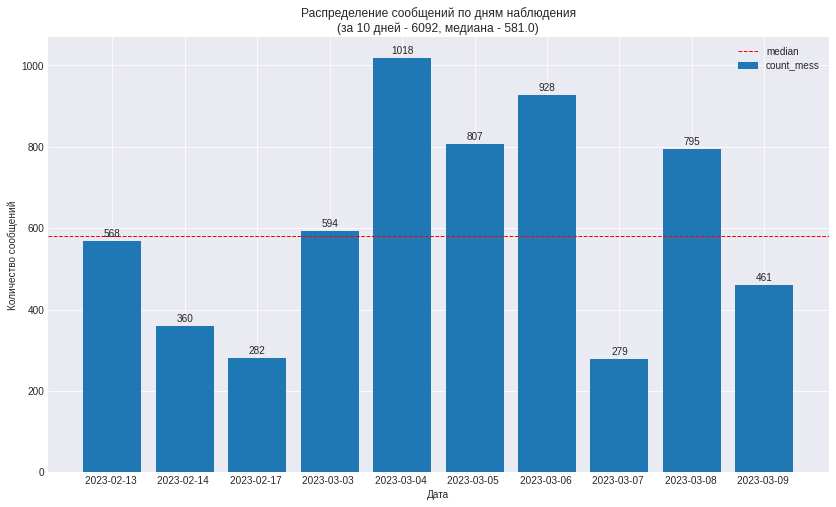

In [189]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['count_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "count_mess")

  plt.axhline(y=med_mess_count, color='red', linestyle='--', linewidth=1, label='median')

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по дням наблюдения\n(за {len(groups_x)} дней - {sum(values_y)}, медиана - {med_mess_count})')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

### plt.style.available:

In [190]:
# vibo: темы для оформления
for i in enumerate(plt.style.available):
  print(f'{i}')

(0, 'Solarize_Light2')
(1, '_classic_test_patch')
(2, '_mpl-gallery')
(3, '_mpl-gallery-nogrid')
(4, 'bmh')
(5, 'classic')
(6, 'dark_background')
(7, 'fast')
(8, 'fivethirtyeight')
(9, 'ggplot')
(10, 'grayscale')
(11, 'seaborn')
(12, 'seaborn-bright')
(13, 'seaborn-colorblind')
(14, 'seaborn-dark')
(15, 'seaborn-dark-palette')
(16, 'seaborn-darkgrid')
(17, 'seaborn-deep')
(18, 'seaborn-muted')
(19, 'seaborn-notebook')
(20, 'seaborn-paper')
(21, 'seaborn-pastel')
(22, 'seaborn-poster')
(23, 'seaborn-talk')
(24, 'seaborn-ticks')
(25, 'seaborn-white')
(26, 'seaborn-whitegrid')
(27, 'tableau-colorblind10')


### datetime example

In [191]:
# vibo: приведем данные, чтобы забрать день недели
example = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
example = pd.to_datetime(example['date'])

example.dt.day_name()

0       Monday
1      Tuesday
2       Friday
3       Friday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8    Wednesday
9     Thursday
Name: date, dtype: object

## 3.2 Категории сообщений

Сообщения сервера классифицируется следующим образом:
* `Async Chat Thread` - чат;
* `Server thread` - игровой процесс;
* `ServerMain` - системные сообщения;
* `User Authenticator` - индентификация пользователя;
* `Worker-Main` - процесс построения мира.

In [192]:
sorted(list(summary['serv_teg_inf'].unique()))

['Async Chat Thread',
 'Server thread',
 'ServerMain',
 'User Authenticator',
 'Worker-Main']

Визуализируем распределение сообщений по дням с учетом их категорий. Преобразуем данные.

In [193]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg_inf').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg_inf')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg_inf,count_mess,%
0,Server thread,5003,82.12
1,Worker-Main,891,14.63
2,User Authenticator,93,1.53
3,ServerMain,86,1.41
4,Async Chat Thread,19,0.31


In [194]:
# vibo: понадобится для графиков
sort_labels = list(plot_df['serv_teg_inf'].values)
sort_labels

['Server thread',
 'Worker-Main',
 'User Authenticator',
 'ServerMain',
 'Async Chat Thread']

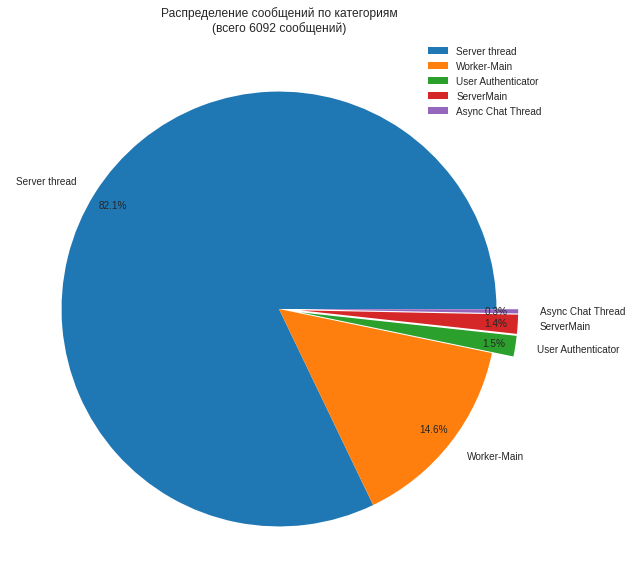

In [195]:
labels = plot_df['serv_teg_inf'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.1f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по категориям\n(всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Из графика видно, что большинство сообщений относятся к категории `Server thread` и `Worker-Main`.

In [196]:
# vibo: распределение сообщений по дням, группировка по типам
summary.groupby(['date', 'serv_teg_inf'])['date'].count()

date         serv_teg_inf      
2023-02-13   Server thread         414
             ServerMain             14
             User Authenticator      2
             Worker-Main           138
2023-02-14   Server thread         295
             ServerMain              6
             User Authenticator      1
             Worker-Main            58
2023-02-17   Async Chat Thread      12
             Server thread         233
             ServerMain              3
             User Authenticator      8
             Worker-Main            26
2023-03-03   Server thread         470
             ServerMain              9
             User Authenticator     11
             Worker-Main           104
2023-03-04   Async Chat Thread       1
             Server thread         845
             ServerMain             15
             User Authenticator      3
             Worker-Main           154
2023-03-05   Async Chat Thread       5
             Server thread         694
             ServerMain         

Посмотрим, как сообщения с учетом их категорий распределены по дням рассматриваемого периода

In [197]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().unstack('serv_teg_inf').reset_index()
# vibo: заменили пропуски на 0
plot_df = plot_df.fillna(0)
# vibo: перенесли столбец в индекс
plot_df = plot_df.set_index('date')
# vibo: sort_labels сдлеал выше, чтобы цвета сохранить для одной категории сообщения, ресетнули индекс
plot_df = plot_df[sort_labels].reset_index()
plot_df

serv_teg_inf,date,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread
0,2023-02-13,414.0,138.0,2.0,14.0,0.0
1,2023-02-14,295.0,58.0,1.0,6.0,0.0
2,2023-02-17,233.0,26.0,8.0,3.0,12.0
3,2023-03-03,470.0,104.0,11.0,9.0,0.0
4,2023-03-04,845.0,154.0,3.0,15.0,1.0
5,2023-03-05,694.0,82.0,17.0,9.0,5.0
6,2023-03-06,781.0,111.0,24.0,12.0,0.0
7,2023-03-07,239.0,27.0,10.0,3.0,0.0
8,2023-03-08,668.0,107.0,10.0,9.0,1.0
9,2023-03-09,364.0,84.0,7.0,6.0,0.0


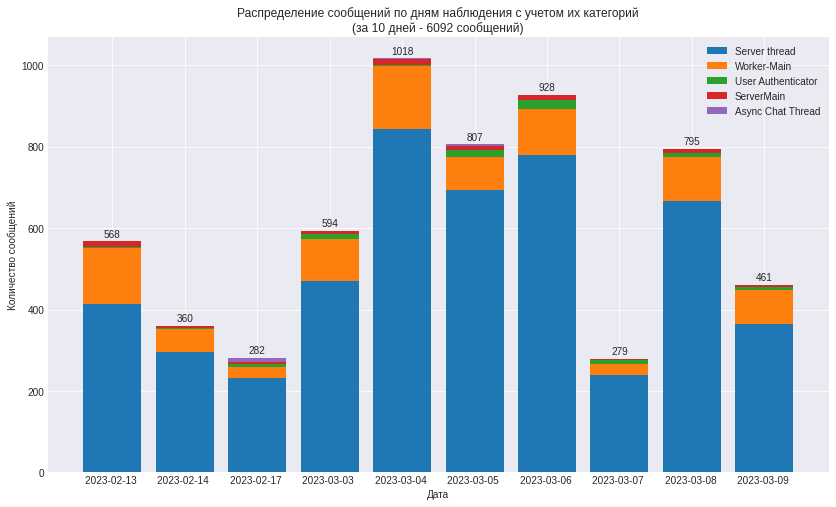

In [198]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по дням наблюдения с учетом их категорий\n(за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

При большем количестве дней наблюдений можно построить график загрузки от дней недели (усреднить значения). Еще у нас есть столбец время сообщения, можно строить более сложные графики с учетом этих данных.

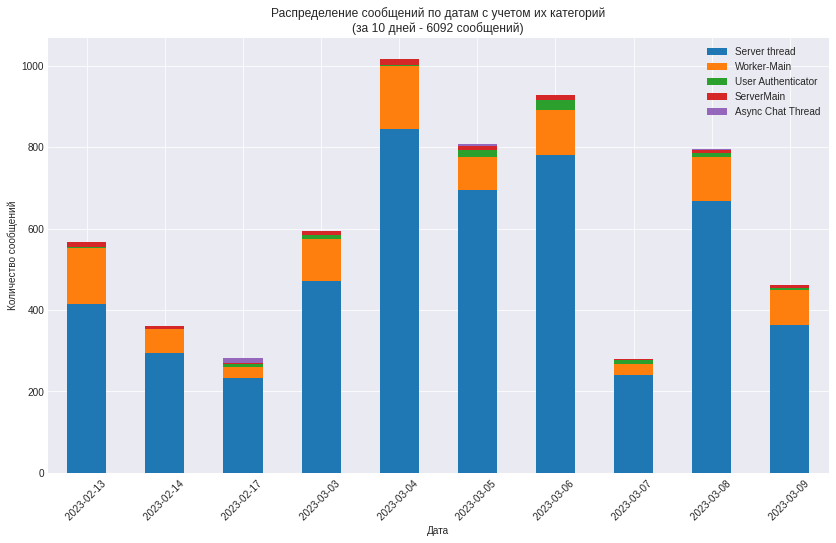

In [199]:
# vibo: stacked bar chart (pandas default -> plot_df.plot.bar)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  plot_df.plot.bar(x='date', stacked=True, figsize=(14, 8))

  plt.title(f'Распределение сообщений по датам с учетом их категорий\n(за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  plt.legend(loc='best')
  plt.xlabel('Дата')
  plt.xticks(rotation = 45)
  plt.ylabel('Количество сообщений')
  plt.show()

## 3.3 Типы сообщений

In [200]:
list(summary['serv_teg'].unique())

['INFO', 'ERROR', 'WARN']

In [201]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение тегов
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg,count_mess,%
0,INFO,5940,97.50
1,WARN,151,2.48
2,ERROR,1,0.02


In [202]:
# vibo: зададим сортировку для графиков
sort_labels = ['INFO', 'WARN', 'ERROR']

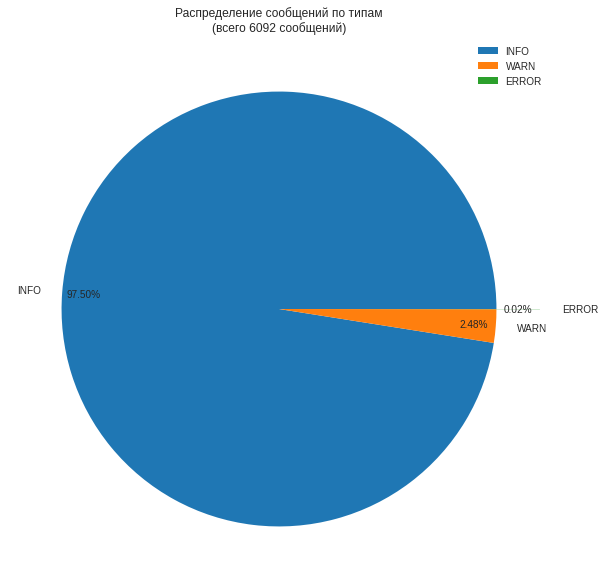

In [203]:
labels = plot_df['serv_teg'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.2]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по типам\n(всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

In [204]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df[['date', 'INFO', 'WARN', 'ERROR']]

serv_teg,date,INFO,WARN,ERROR
0,2023-02-13,557.0,10.0,1.0
1,2023-02-14,348.0,12.0,0.0
2,2023-02-17,277.0,5.0,0.0
3,2023-03-03,580.0,14.0,0.0
4,2023-03-04,994.0,24.0,0.0
5,2023-03-05,780.0,27.0,0.0
6,2023-03-06,905.0,23.0,0.0
7,2023-03-07,267.0,12.0,0.0
8,2023-03-08,781.0,14.0,0.0
9,2023-03-09,451.0,10.0,0.0


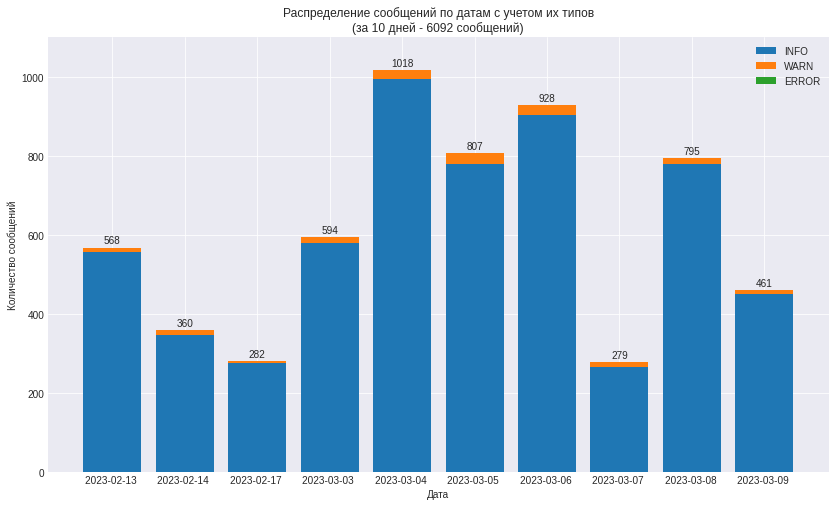

In [206]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам с учетом их типов\n(за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 1100)
  ax.set_ylabel('Количество сообщений')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

## 3.4 Двойные группировки

### Категория - Тип

Группируем информацию по дате и категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для каждой категории по дням.

In [207]:
# vibo: получаем мультииндекс
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg_inf       serv_teg           
2023-02-13  Server thread      INFO            405
                               WARN              9
            ServerMain         ERROR             1
                               INFO             12
                               WARN              1
            User Authenticator INFO              2
            Worker-Main        INFO            138
2023-02-14  Server thread      INFO            283
                               WARN             12
            ServerMain         INFO              6
            User Authenticator INFO              1
            Worker-Main        INFO             58
2023-02-17  Async Chat Thread  INFO             12
            Server thread      INFO            228
                               WARN              5
            ServerMain         INFO              3
            User Authenticator INFO              8
            Worker-Main        INFO             26
2023-03-03  Server thread      INFO            456
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             11
            Worker-Main        INFO            104
2023-03-04  Async Chat Thread  INFO              1
            Server thread      INFO            821
                               WARN             24
            ServerMain         INFO             15
            User Authenticator INFO              3
            Worker-Main        INFO            154
2023-03-05  Async Chat Thread  INFO              5
            Server thread      INFO            667
                               WARN             27
            ServerMain         INFO              9
            User Authenticator INFO             17
            Worker-Main        INFO             82
2023-03-06  Server thread      INFO            758
                               WARN             23
            ServerMain         INFO             12
            User Authenticator INFO             24
            Worker-Main        INFO            111
2023-03-07  Server thread      INFO            227
                               WARN             12
            ServerMain         INFO              3
            User Authenticator INFO             10
            Worker-Main        INFO             27
2023-03-08  Async Chat Thread  INFO              1
            Server thread      INFO            654
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             10
            Worker-Main        INFO            107
2023-03-09  Server thread      INFO            354
                               WARN             10
            ServerMain         INFO              6
            User Authenticator INFO              7
            Worker-Main        INFO             84

Группировка по категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на общее количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для своей категории.

In [208]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg_inf       serv_teg           
Async Chat Thread  INFO             19
Server thread      INFO           4853
                   WARN            150
ServerMain         ERROR             1
                   INFO             84
                   WARN              1
User Authenticator INFO             93
Worker-Main        INFO            891

In [209]:
plot_df = plot_df.unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg_inf serv_mess               
serv_teg                         ERROR    INFO   WARN
0          Async Chat Thread       0.0    19.0    0.0
1              Server thread       0.0  4853.0  150.0
2                 ServerMain       1.0    84.0    1.0
3         User Authenticator       0.0    93.0    0.0
4                Worker-Main       0.0   891.0    0.0

In [210]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg_inf', 'ERROR', 'INFO', 'WARN']
plot_df

,serv_teg_inf,ERROR,INFO,WARN
0,Async Chat Thread,0.0,19.0,0.0
1,Server thread,0.0,4853.0,150.0
2,ServerMain,1.0,84.0,1.0
3,User Authenticator,0.0,93.0,0.0
4,Worker-Main,0.0,891.0,0.0


In [211]:
plot_df = plot_df[['serv_teg_inf', 'INFO', 'WARN', 'ERROR']]
plot_df['count_mess'] = plot_df[['INFO', 'WARN', 'ERROR']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

<ipython-input-211-c67a5287df4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['count_mess'] = plot_df[['INFO', 'WARN', 'ERROR']].sum(axis=1)


,serv_teg_inf,INFO,WARN,ERROR,count_mess
0,Server thread,4853.0,150.0,0.0,5003.0
1,Worker-Main,891.0,0.0,0.0,891.0
2,User Authenticator,93.0,0.0,0.0,93.0
3,ServerMain,84.0,1.0,1.0,86.0
4,Async Chat Thread,19.0,0.0,0.0,19.0


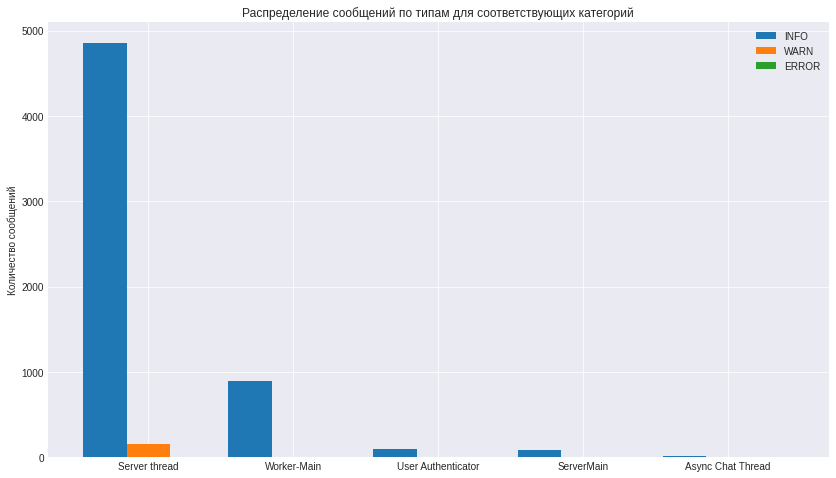

In [212]:
# vibo: data
groups_x = plot_df['serv_teg_inf']
g1 = plot_df['INFO'] 
g2 = plot_df['WARN']
g3 = plot_df['ERROR']

# vibo: bar chart for 3-groups (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):

  width = 0.3
  x = np.arange(len(groups_x))
  fig, ax = plt.subplots(figsize=(14, 8))

  rects1 = ax.bar(x - width, g1, width, label='INFO')
  rects2 = ax.bar(x, g2, width, label='WARN')
  rects3 = ax.bar(x + width, g3, width, label='ERROR')

  plt.title(f'Распределение сообщений по типам для соответствующих категорий')
  ax.legend(loc='best')
  ax.set_xticks(x)
  ax.set_xticklabels(groups_x)
  ax.set_ylabel('Количество сообщений')
  plt.show()

### Тип - Категория

Теперь группируем информацию по дате и тапам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для каждого типа по дням.

In [213]:
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg serv_teg_inf                 
2023-02-13  ERROR    ServerMain                  1
            INFO     Server thread             405
                     ServerMain                 12
                     User Authenticator          2
                     Worker-Main               138
            WARN     Server thread               9
                     ServerMain                  1
2023-02-14  INFO     Server thread             283
                     ServerMain                  6
                     User Authenticator          1
                     Worker-Main                58
            WARN     Server thread              12
2023-02-17  INFO     Async Chat Thread          12
                     Server thread             228
                     ServerMain                  3
                     User Authenticator          8
                     Worker-Main                26
            WARN     Server thread               5
2023-03-03  INFO     Server thread             456
                     ServerMain                  9
                     User Authenticator         11
                     Worker-Main               104
            WARN     Server thread              14
2023-03-04  INFO     Async Chat Thread           1
                     Server thread             821
                     ServerMain                 15
                     User Authenticator          3
                     Worker-Main               154
            WARN     Server thread              24
2023-03-05  INFO     Async Chat Thread           5
                     Server thread             667
                     ServerMain                  9
                     User Authenticator         17
                     Worker-Main                82
            WARN     Server thread              27
2023-03-06  INFO     Server thread             758
                     ServerMain                 12
                     User Authenticator         24
                     Worker-Main               111
            WARN     Server thread              23
2023-03-07  INFO     Server thread             227
                     ServerMain                  3
                     User Authenticator         10
                     Worker-Main                27
            WARN     Server thread              12
2023-03-08  INFO     Async Chat Thread           1
                     Server thread             654
                     ServerMain                  9
                     User Authenticator         10
                     Worker-Main               107
            WARN     Server thread              14
2023-03-09  INFO     Server thread             354
                     ServerMain                  6
                     User Authenticator          7
                     Worker-Main                84
            WARN     Server thread              10

Группировка по о типам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на общее количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для совего типа.

In [214]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg serv_teg_inf                 
ERROR    ServerMain                  1
INFO     Async Chat Thread          19
         Server thread            4853
         ServerMain                 84
         User Authenticator         93
         Worker-Main               891
WARN     Server thread             150
         ServerMain                  1

In [215]:
plot_df = plot_df.unstack('serv_teg_inf').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg         serv_mess                           \
serv_teg_inf          Async Chat Thread Server thread ServerMain   
0               ERROR               0.0           0.0        1.0   
1                INFO              19.0        4853.0       84.0   
2                WARN               0.0         150.0        1.0   

                                             
serv_teg_inf User Authenticator Worker-Main  
0                           0.0         0.0  
1                          93.0       891.0  
2                           0.0         0.0

In [216]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg', 'Async Chat Thread', 'Server thread', 'ServerMain', 'User Authenticator', 'Worker-Main']
plot_df

,serv_teg,Async Chat Thread,Server thread,ServerMain,User Authenticator,Worker-Main
0,ERROR,0.0,0.0,1.0,0.0,0.0
1,INFO,19.0,4853.0,84.0,93.0,891.0
2,WARN,0.0,150.0,1.0,0.0,0.0


In [217]:
plot_df = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']]
plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

<ipython-input-217-15823d17a44c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)
<ipython-input-217-15823d17a44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)


,serv_teg,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread,count_mess
0,INFO,4853.0,891.0,93.0,84.0,19.0,5940.0
1,WARN,150.0,0.0,0.0,1.0,0.0,151.0
2,ERROR,0.0,0.0,0.0,1.0,0.0,1.0


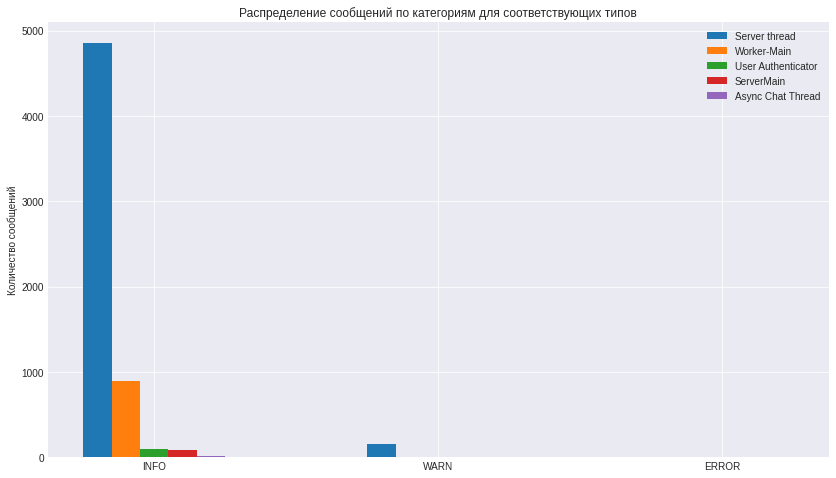

In [218]:
# vibo: data
groups_x = plot_df['serv_teg']
g1 = plot_df['Server thread'] 
g2 = plot_df['Worker-Main']
g3 = plot_df['User Authenticator']
g4 = plot_df['ServerMain']
g5 = plot_df['Async Chat Thread']

# vibo: bar chart for 5-groups (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):

  width = 0.1
  x = np.arange(len(groups_x))
  fig, ax = plt.subplots(figsize=(14, 8))

  rects1 = ax.bar(x - width*2, g1, width, label='Server thread')
  rects1 = ax.bar(x - width, g2, width, label='Worker-Main')
  rects3 = ax.bar(x, g3, width, label='User Authenticator')
  rects4 = ax.bar(x + width, g4, width, label='ServerMain')
  rects5 = ax.bar(x + width*2, g5, width, label='Async Chat Thread')

  plt.title(f'Распределение сообщений по категориям для соответствующих типов')
  ax.legend(loc='best')
  ax.set_xticks(x)
  ax.set_xticklabels(groups_x)
  ax.set_ylabel('Количество сообщений')
  plt.show()

## 3.5 Ошибки на сервере

In [219]:
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [220]:
summary[summary['serv_teg'] == 'ERROR'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...


Ошибка была из-за неправильно заполненного основного конфигурационного файла сервера (server.properties).

## 3.6 Предупреждения на сервере

In [221]:
summary[summary['serv_teg'] == 'WARN'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt
248,2023-02-13,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,Server thread,WARN,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,Server thread,WARN,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."
...,...,...,...,...,...
6336,2023-03-09,17:56:12,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
6337,2023-03-09,17:56:12,Server thread,WARN,The server will make no attempt to authentica...
6338,2023-03-09,17:56:12,Server thread,WARN,While this makes the game possible to play wi...
6339,2023-03-09,17:56:12,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."


In [222]:
summary[summary['serv_teg'] == 'WARN'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,151,151,151,151,151
unique,10,71,2,1,50
top,2023-03-05,20:43:44,Server thread,WARN,The server will make no attempt to authentica...
freq,27,4,150,151,26


In [223]:
# vibo: преобразуем в датафрейм
plot_df = summary[summary['serv_teg'] == 'WARN'].groupby(['date', 'serv_teg_inf'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg_inf').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение тегов
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df

,serv_teg_inf,count_mess,%
0,Server thread,150,99.34
1,ServerMain,1,0.66


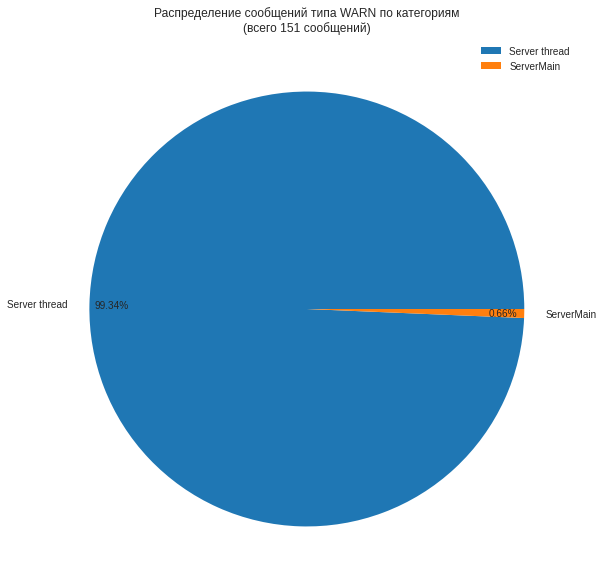

In [224]:
labels = plot_df['serv_teg_inf'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.pie(value, labels=labels, pctdistance=0.9, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений типа WARN по категориям\n(всего {sum(value)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Предупреждение в категории ServerMain

In [225]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'ServerMain')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt


Предупреждения в категории Server thread

In [226]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
248,2023-02-13,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,Server thread,WARN,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,Server thread,WARN,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."
419,2023-02-13,21:59:41,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
...,...,...,...,...,...
6336,2023-03-09,17:56:12,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
6337,2023-03-09,17:56:12,Server thread,WARN,The server will make no attempt to authentica...
6338,2023-03-09,17:56:12,Server thread,WARN,While this makes the game possible to play wi...
6339,2023-03-09,17:56:12,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."


In [227]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,150,150,150,150,150
unique,10,70,1,1,49
top,2023-03-05,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
freq,27,4,150,150,26


In [228]:
# vibo: сгруппируем предупреждения по их частоте появления, выведем их
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')]['serv_mess'].value_counts().head()

 **** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!                                                                                                          26
 While this makes the game possible to play without internet access, it also opens up the ability for hackers to connect with any username they choose.    26
 To change this, set "online-mode" to "true" in the server.properties file.                                                                                26
 The server will make no attempt to authenticate usernames. Beware.                                                                                        26
 handleDisconnection() called twice                                                                                                                         2
Name: serv_mess, dtype: int64

Стандартное сообщение в четыре строки `SERVER IS RUNNING IN OFFLINE/INSECURE MODE!` пропустим.

### too quickly

In [229]:
df_too_quickly = summary['serv_mess'].map(lambda x: "too quickly" in x).to_frame(name='is_too_quickly')
ind_is_too_quickly = df_too_quickly[df_too_quickly['is_too_quickly'] == True].index
plot_df = summary[summary.index.isin(ind_is_too_quickly)][['date', 'time', 'serv_mess']]
plot_df.head()

,date,time,serv_mess
918,2023-02-14,23:54:11,"vibO moved too quickly! 0.0,10.93076968413333..."
919,2023-02-14,23:54:14,"vibO moved too quickly! 8.114709718208843,6.2..."
920,2023-02-14,23:54:19,"vibO moved too quickly! 4.513303126848854,6.1..."
1621,2023-03-03,19:31:09,"rex moved too quickly! 9.776224724385258,1.98..."
3524,2023-03-05,15:15:45,amogoos moved too quickly! -5.286351766136619...


In [230]:
plot_df['user_name'] = plot_df['serv_mess'].map(lambda x: x.split()[0])
plot_df.head()

,date,time,serv_mess,user_name
918,2023-02-14,23:54:11,"vibO moved too quickly! 0.0,10.93076968413333...",vibO
919,2023-02-14,23:54:14,"vibO moved too quickly! 8.114709718208843,6.2...",vibO
920,2023-02-14,23:54:19,"vibO moved too quickly! 4.513303126848854,6.1...",vibO
1621,2023-03-03,19:31:09,"rex moved too quickly! 9.776224724385258,1.98...",rex
3524,2023-03-05,15:15:45,amogoos moved too quickly! -5.286351766136619...,amogoos


Данное предупреждение может свидетельствовать об использовании читов игроком.

In [231]:
plot_df['user_name'].value_counts()

amogoos         6
vibO            3
YOUTUBE_plaY    2
rex             1
testing1        1
Name: user_name, dtype: int64

### overloaded

In [232]:
df_is_serv_over = summary['serv_mess'].map(lambda x: "Can't keep up! Is the server overloaded?" in x).to_frame(name='is_serv_over')
ind_is_serv_over = df_is_serv_over[df_is_serv_over['is_serv_over'] == True].index
plot_df = summary[summary.index.isin(ind_is_serv_over)][['date', 'time', 'serv_mess']]
plot_df.head()

,date,time,serv_mess
569,2023-02-13,22:02:02,Can't keep up! Is the server overloaded? Runn...
917,2023-02-14,23:54:09,Can't keep up! Is the server overloaded? Runn...
1098,2023-02-17,19:05:53,Can't keep up! Is the server overloaded? Runn...
1392,2023-03-03,18:05:52,Can't keep up! Is the server overloaded? Runn...
1988,2023-03-04,18:10:37,Can't keep up! Is the server overloaded? Runn...


Выделим время запуска в сообщении с предупреждением (время в милисекундах, ms)

In [233]:
plot_df['running_time'] = plot_df['serv_mess'].map(lambda x: x.split()[8][:-2])
plot_df.sort_values('running_time', ascending=False).head()

,date,time,serv_mess,running_time
3641,2023-03-05,18:20:05,Can't keep up! Is the server overloaded? Runn...,8493
3611,2023-03-05,15:46:42,Can't keep up! Is the server overloaded? Runn...,7054
3541,2023-03-05,15:22:27,Can't keep up! Is the server overloaded? Runn...,6271
3664,2023-03-05,18:34:41,Can't keep up! Is the server overloaded? Runn...,5946
3607,2023-03-05,15:45:31,Can't keep up! Is the server overloaded? Runn...,5929


In [234]:
# vibo: приведем новый столбец к int
plot_df['running_time'] = plot_df['running_time'].astype(int)

In [153]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 569 to 6550
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          32 non-null     object
 1   time          32 non-null     object
 2   serv_mess     32 non-null     object
 3   running_time  32 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [235]:
plot_df['running_time'].describe()

count       32.000000
mean      6071.312500
std       3324.376657
min       5003.000000
25%       5102.750000
50%       5229.000000
75%       5625.000000
max      23885.000000
Name: running_time, dtype: float64

In [236]:
# vibo: медианное значение времени запуска в секундах
med_running = plot_df['running_time'].describe()['50%']
med_running = round(med_running / 1000, 1)
med_running

5.2

In [237]:
# vibo: среднее арифметическое время запуска в милисекундах 
plot_df[['date', 'running_time']].groupby(['date'])['running_time'].agg('mean')

date
2023-02-13     5152.000000
2023-02-14     5101.000000
2023-02-17     5158.000000
2023-03-03     5147.000000
2023-03-04     5215.000000
2023-03-05     6002.900000
2023-03-06     8326.833333
2023-03-07     5313.000000
2023-03-08     5535.000000
2023-03-09     5338.000000
Name: running_time, dtype: float64

In [238]:
plot_df = plot_df[['date', 'running_time']].groupby(['date'])['running_time'].agg('median').to_frame(name='running_time_median').reset_index()
plot_df['running_time_median'] = (plot_df['running_time_median'] / 1000).round(1)
plot_df

,date,running_time_median
0,2023-02-13,5.2
1,2023-02-14,5.1
2,2023-02-17,5.2
3,2023-03-03,5.1
4,2023-03-04,5.3
5,2023-03-05,5.7
6,2023-03-06,5.1
7,2023-03-07,5.3
8,2023-03-08,5.5
9,2023-03-09,5.3


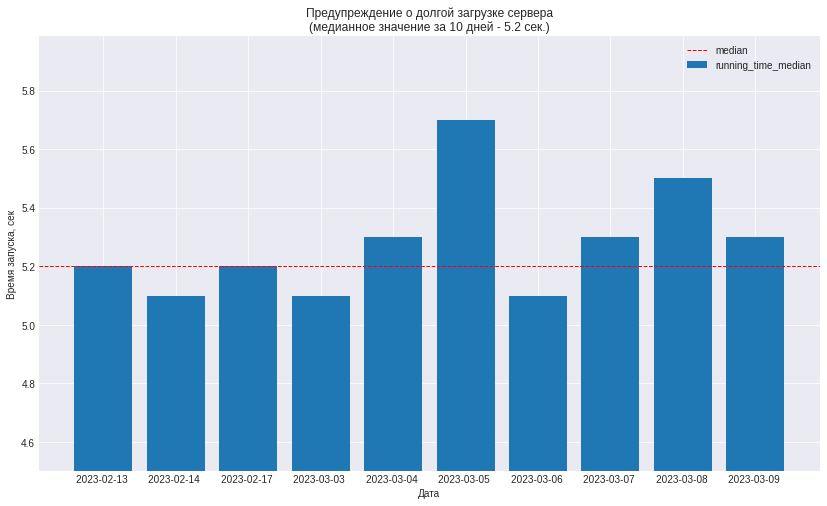

In [239]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['running_time_median'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "running_time_median")

  plt.axhline(y=med_running, color='red', linestyle='--', linewidth=1, label='median')

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.05, round(values_y[i], 2), ha='center')

  plt.title(f"Предупреждение о долгой загрузке сервера\n(медианное значение за {len(groups_x)} дней - {med_running} сек.)")
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(4.5)
  ax.set_ylabel('Время запуска, сек')
  plt.show()

### handleDisconnection

In [240]:
df_handle_discon = summary['serv_mess'].map(lambda x: "handleDisconnection" in x).to_frame(name='handle_discon')
ind_handle_discon = df_handle_discon[df_handle_discon['handle_discon'] == True].index
summary[summary.index.isin(ind_handle_discon)]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
2835,2023-03-04,21:15:02,Server thread,WARN,handleDisconnection() called twice,NaN,NaN,NaN
5637,2023-03-08,16:58:26,Server thread,WARN,handleDisconnection() called twice,NaN,NaN,NaN


Интересное сообщение, вернемся к нему позже.